In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
from statsmodels.api import OLS
import numpy as np
import statsmodels.api as sm

In [4]:
# def calculate_half_life(spread):
#     df_spread = pd.DataFrame(spread, columns=['Spread'])
#     spread_lag = df_spread['Spread'].shift(1)
#     spread_lag.iloc[0] = spread_lag.iloc[1]
#     spread_return = df_spread['Spread'] - spread_lag
#     spread_return.iloc[0] = spread_return.iloc[1]
#     spread_lag2 = sm.add_constant(spread_lag)
#     model = sm.OLS(spread_return, spread_lag2)
#     res = model.fit()
#     half_life = round(-np.log(2) / res.params[1], 0)
#     return half_life

# calculate_half_life(data['Spread'])

In [5]:
# Step 1: Download Historical Data
xauusd = yf.download("GC=F", start="2019-01-01", end="2024-01-01")
xagusd = yf.download("SI=F", start="2019-01-01", end="2024-01-01")

# Prepare the data
data = pd.DataFrame({
    'Gold': xauusd['Adj Close']['GC=F'],
    'Silver': xagusd['Adj Close']['SI=F']
}).dropna()

del xauusd
del xagusd

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
# Step 2: Analyze Relationships
correlation = data.corr()
print(f"Correlation between Gold and Silver: {correlation.loc['Gold', 'Silver']}")

# Cointegration Test
score, p_value, _ = coint(data['Gold'], data['Silver'])
print(f"Cointegration p-value: {p_value}")

Correlation between Gold and Silver: 0.8319010117243449
Cointegration p-value: 0.668497624232878


### Calculate Hedge Ratio

In [7]:
xauusd = yf.download("GC=F", start="2022-01-01", end="2023-01-01")
xagusd = yf.download("SI=F", start="2022-01-01", end="2023-01-01")

# Prepare the data
data = pd.DataFrame({
    'Gold': xauusd['Adj Close']['GC=F'],
    'Silver': xagusd['Adj Close']['SI=F']
}).dropna()

del xauusd
del xagusd

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
# Step 3: Calculate the Spread
model = OLS(data['Gold'], data['Silver']).fit()
hedge_ratio = np.array(model.params)

### Calculate Spread

In [9]:
xauusd = yf.download("GC=F", start="2023-01-01", end="2024-01-01")
xagusd = yf.download("SI=F", start="2023-01-01", end="2024-01-01")

# Prepare the data
data = pd.DataFrame({
    'Gold': xauusd['Adj Close']['GC=F'],
    'Silver': xagusd['Adj Close']['SI=F']
}).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
data['Spread'] = data['Gold'] - (hedge_ratio * data['Silver'])

In [11]:
# Standardize the Spread (Z-Score)
WINDOW = 30
mean_spread = data['Spread'].rolling(center=False, window=WINDOW).mean()
std_spread = data['Spread'].rolling(center=False, window=WINDOW).std()
data['Z-Score'] = (data['Spread'] - mean_spread) / std_spread

In [ ]:
backtest_df = pd.DataFrame({
    "gold": data['Gold'],
    "silver": data['Silver'],
    "zscore": data['Z-Score'],
    })

backtest_df['positions_Gold_Long'] = 0
backtest_df['positions_Silver_Long'] = 0
backtest_df['positions_Gold_Short'] = 0
backtest_df['positions_Silver_Short'] = 0

,gold,silver,zscore,positions_Gold_Long,positions_Silver_Long,positions_Gold_Short,positions_Silver_Short
Date,,,,,,,
2023-01-03 00:00:00+00:00,1839.699951,24.059000,NaN,0,0,0,0
2023-01-04 00:00:00+00:00,1852.800049,23.792000,NaN,0,0,0,0
2023-01-05 00:00:00+00:00,1834.800049,23.257999,NaN,0,0,0,0
2023-01-06 00:00:00+00:00,1864.199951,23.822001,NaN,0,0,0,0
2023-01-09 00:00:00+00:00,1872.699951,23.712000,NaN,0,0,0,0
...,...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,2057.100098,24.290001,0.325572,0,0,0,0
2023-12-26 00:00:00+00:00,2058.199951,24.143999,0.662684,0,0,0,0
2023-12-27 00:00:00+00:00,2081.899902,24.375000,0.825026,0,0,0,0


In [24]:
# Recall, we are trading the "synthetic pair" Gold/Silver and betting on its mean reversion

backtest_df.loc[backtest_df.zscore >= 1, ('positions_Gold_Short', 'positions_Silver_Short')] = [-1, 1] # Short spread
backtest_df.loc[backtest_df.zscore <= -1, ('positions_Gold_Long', 'positions_Silver_Long')] = [1, -1] # Buy spread
backtest_df.loc[backtest_df.zscore <= 0, ('positions_Gold_Short', 'positions_Silver_Short')] = 0 # Exit short spread
backtest_df.loc[backtest_df.zscore >= 0, ('positions_Gold_Long', 'positions_Silver_Long')] = 0 # Exit long spread

backtest_df.fillna(method='ffill', inplace=True) # ensure existing positions are carried forward unless there is an exit signal

/var/folders/k_/3s9bjxk17ss2bty8k9tjwjrc0000gn/T/ipykernel_32785/325996299.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backtest_df.fillna(method='ffill', inplace=True) # ensure existing positions are carried forward unless there is an exit signal


In [25]:
positions_Long = backtest_df[['positions_Gold_Long', 'positions_Silver_Long']]
positions_Short = backtest_df[['positions_Gold_Short', 'positions_Silver_Short']]
positions = np.array(positions_Long) + np.array(positions_Short)
positions = pd.DataFrame(positions, index=positions_Long.index, columns=['gold','silver'])

dailyret = backtest_df[['gold', 'silver']].pct_change() 
pnl = (positions.shift() * dailyret).sum(axis=1)

pnl[1:].sum()*100

np.float64(8.9982971807123)

In [26]:
# PnL Calculation
# Shift the positions for the daily return calculation (positions taken on previous day)
daily_positions = positions.shift()  # shift positions one day back
daily_positions = daily_positions.fillna(0)  # Ensure there are no NaN values

# Calculate daily returns
dailyret = backtest_df[['gold', 'silver']].pct_change()

# Calculate PnL for the strategy
pnl = (daily_positions * dailyret).sum(axis=1)

# Total profit or loss percentage
total_pnl = pnl[1:].sum() * 100  # Don't include the first NaN value

total_pnl


np.float64(8.9982971807123)

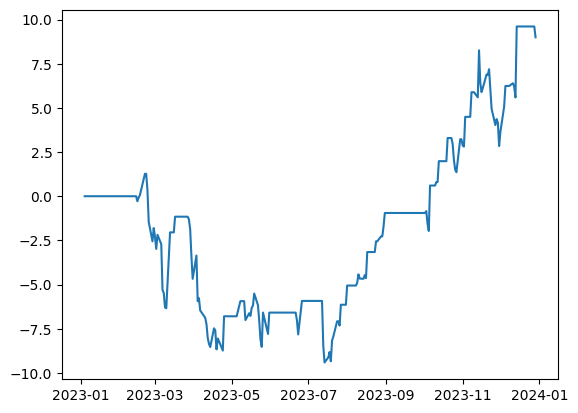

In [27]:
plt.plot(pnl[1:].cumsum()*100)
plt.show()

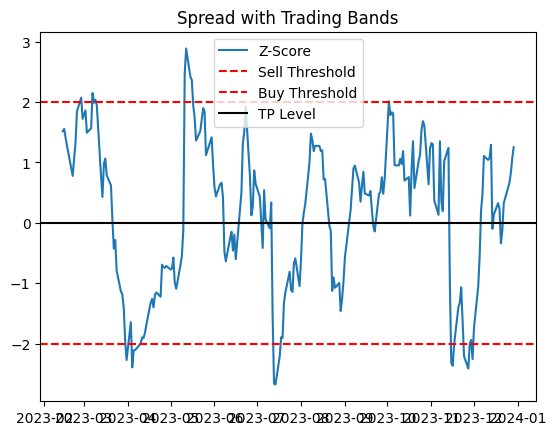

In [28]:
threshold = 2
plt.plot(backtest_df.zscore, label="Z-Score")
plt.axhline(threshold, color='red', linestyle='--', label='Sell Threshold')
plt.axhline(-threshold, color='red', linestyle='--', label='Buy Threshold')
plt.axhline(0, color='black', linestyle='-', label='TP Level')
plt.title('Spread with Trading Bands')
plt.legend()
plt.show()

In [30]:
from tabulate import tabulate

# Calculate cumulative returns
cumulative_returns = (1 + pnl).cumprod()

# Metrics calculations
start_value = cumulative_returns.iloc[0]
end_value = cumulative_returns.iloc[-1]
num_years = len(cumulative_returns) / 252  # Assuming 252 trading days per year

# CAGR (Compound Annual Growth Rate)
CAGR = ((end_value / start_value) ** (1 / num_years)) - 1

# Maximum Drawdown
drawdown = cumulative_returns / cumulative_returns.cummax() - 1
max_drawdown = drawdown.min()

# Standard Deviation
std_dev = pnl.std()

# Create a metrics table
metrics = [
    ["CAGR", f"{CAGR:.2%}"],
    ["Max Drawdown", f"{max_drawdown:.2%}"],
    ["Standard Deviation", f"{std_dev:.2%}"]
]

# Print with tabulate
print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))

+--------------------+---------+
| Metric             | Value   |
+====================+=========+
| CAGR               | 8.67%   |
+--------------------+---------+
| Max Drawdown       | -10.48% |
+--------------------+---------+
| Standard Deviation | 0.78%   |
+--------------------+---------+
